In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%pylab inline

from datetime import datetime,timedelta
import re

import time

from scipy import stats

import seaborn as sns

# import sys
# reload(sys)
# sys.setdefaultencoding('utf-8')

Populating the interactive namespace from numpy and matplotlib


In [172]:
data = pd.read_csv('imbalanced_merged_grouped.csv')

In [3]:
data.columns

Index([u'Unnamed: 0', u'Unnamed: 0.1', u'advertiser_app_store_id',
       u'country_code', u'city', u'campaign_id', u'creative_id',
       u'device_language', u'device_make', u'device_model', u'device_platform',
       u'device_connection', u'device_os_version', u'device_screen_height',
       u'device_screen_width', u'device_volume', u'event_id',
       u'n_campaign_views', u'n_vungle_installs', u'publisher_app_store_id',
       u'time_of_last_delivery_this_campaign',
       u'time_of_last_delivery_this_creative',
       u'time_of_last_delivery_any_installed_app',
       u'time_of_last_vungle_delivery', u'time_of_this_impression',
       u'timestamp_at_install', u'time_of_this_request', u'time_zone',
       u'is_install', u'market_id', u'is_publisher', u'platform', u'title',
       u'created_at', u'last_updated_at', u'version', u'size', u'developer',
       u'developer_website', u'market_url', u'languages', u'content_rating',
       u'genre_ids', u'genres', u'current_version_user_rati

In [4]:
data.shape

(700000, 85)

### drop columns has to many NAs

In [10]:
drop_cols = []
for col in data.columns:
    if sum(data[col].isnull()) > data.shape[0]*0.2:
        drop_cols.append(col)
        print col, "has ", sum(data[col].isnull()), " NAs"

city has  671851  NAs
time_of_last_delivery_this_campaign has  267375  NAs
time_of_last_delivery_this_creative has  387797  NAs
time_of_last_delivery_any_installed_app has  629280  NAs
timestamp_at_install has  564951  NAs
size has  417406  NAs
developer_website has  460289  NAs
genre_ids has  426117  NAs
genres has  426117  NAs
current_version_user_ratings has  426305  NAs
n_current_version_user_ratings has  426305  NAs
price_currency_code has  698179  NAs
min_os_version has  426117  NAs
supported_devices has  426117  NAs
package_name has  288118  NAs
website has  295209  NAs
primary_category has  288118  NAs
categories has  288118  NAs
n_min_downloads has  288118  NAs
n_max_downloads has  288118  NAs
has_in_app_purchases has  288118  NAs
similar has  288118  NAs
time_of_last_delivery_this_campaign_date has  267375  NAs
time_of_last_delivery_this_creative_date has  387797  NAs
time_of_last_delivery_any_installed_app_date has  629280  NAs
current_version_user_ratings_98 has  426305  NA

In [13]:
set(data.columns) - set(drop_cols)

{'Unnamed: 0',
 'Unnamed: 0.1',
 'advertiser_app_store_id',
 'advertiser_app_store_id_98',
 'campaign_id',
 'content_rating',
 'content_rating_98',
 'country_code',
 'country_code_98',
 'created_at',
 'creative_id',
 'developer',
 'developer_98',
 'device_connection',
 'device_connection_98',
 'device_language',
 'device_language_98',
 'device_make',
 'device_model',
 'device_os_version',
 'device_platform',
 'device_platform_98',
 'device_screen_height',
 'device_screen_width',
 'device_volume',
 'event_id',
 'is_install',
 'is_publisher',
 'is_publisher_98',
 'languages',
 'last_updated_at',
 'market_id',
 'market_url',
 'n_campaign_views',
 'n_user_ratings',
 'n_vungle_installs',
 'platform',
 'price_value',
 'publisher_app_store_id',
 'screenshot_urls',
 'screenshot_urls_98',
 'time_of_last_vungle_delivery',
 'time_of_last_vungle_delivery_date',
 'time_of_this_impression',
 'time_of_this_impression_date',
 'time_of_this_request',
 'time_of_this_request_date',
 'time_zone',
 'time_z

In [126]:
def num2weekday(x):
    if x == 0.0:
        return "M"
    elif x == 1.0:
        return "T"
    elif x == 2.0:
        return "W"
    elif x == 3.0:
        return "TH"
    elif x == 4.0:
        return "F"
    elif x == 5.0:
        return "Sat"
    elif x == 6.0:
        return "Sun"

data['time_of_last_vungle_delivery_date'] = data['time_of_last_vungle_delivery_date'].apply(lambda x: num2weekday(x))
data['time_of_this_impression_date'] = data['time_of_this_impression_date'].apply(lambda x: num2weekday(x))
data['time_of_this_request_date'] = data['time_of_this_request_date'].apply(lambda x: num2weekday(x))

In [148]:
data[data['time_zone_region_98'] == 'Indian'] = 'Asia'

### look at the structure of the subset 

In [181]:
temp_data = data[['content_rating_98', 'country_code_98', 'device_os_version', 
                  'device_platform_98', 'is_install', 
                   'n_campaign_views','n_vungle_installs', 'platform',
 'time_of_last_vungle_delivery_date', 'time_of_this_impression_date', 'time_of_this_request_date',
 'time_zone_region_98','user_rating_round']]

data_install = temp_data[temp_data['is_install'] == 1]

In [116]:
temp_data.ix[0,:]

content_rating_98                                             12+
country_code_98                                                PH
device_os_version                                           5.1.1
device_platform_98                                        android
is_install                                                      0
n_campaign_views                                                3
n_vungle_installs                                               0
platform                                                  android
time_of_last_vungle_delivery_date                               F
time_of_this_impression_date                                    F
time_of_this_request_date                                       F
time_zone_region_98                                          Asia
title_98                             Heart of Vegas™ Slots Casino
user_rating_round_98                                            4
version                                                   2.19.21
Name: 0, d

### check levels in each column

In [49]:
for col in temp_data:
    print col, "has ", len(temp_data[col].unique()), " levels"

content_rating_98 has  8  levels
country_code_98 has  137  levels
developer_98 has  1082  levels
device_language_98 has  62  levels
device_make has  3071  levels
device_os_version has  177  levels
device_platform_98 has  3  levels
device_screen_height has  676  levels
device_screen_width has  695  levels
is_install has  2  levels
is_publisher_98 has  1  levels
n_campaign_views has  418  levels
n_vungle_installs has  27  levels
platform has  3  levels
screenshot_urls_98 has  1907  levels
time_of_last_vungle_delivery_date has  8  levels
time_of_this_impression_date has  5  levels
time_of_this_request_date has  7  levels
time_zone_region_98 has  12  levels
title_98 has  1773  levels
user_rating_round_98 has  11  levels
version has  1238  levels


In [85]:
def get_conversion_table(col):
    ins = pd.DataFrame(data_install.groupby(col)['is_install'].count().rename('install_counts')).reset_index()
    total = pd.DataFrame(temp_data.groupby(col)['is_install'].count().rename('total_counts')).reset_index()
    counts_ad = total.merge(ins, how = 'left', on = col).fillna(0.0)
    counts_ad['conversion'] = counts_ad['install_counts']/counts_ad['total_counts']
    return counts_ad.sort_values('conversion', ascending = False)

def plot_coversion(df, col, size = 15):
    plt.figure(figsize=(10, 8))
    sns.stripplot(x=col, y="conversion", data=df, size = size)
    plt.title('Coversion by Country Code')
    t = "Conversion by " + col
    plt.title(t)
    plt.show()
    
def plot_coversion2(df, col):
    plt.figure(figsize=(10, 8))
    df[['conversion']].plot(kind='barh',stacked=True, alpha=0.8)
    plt.xlabel("Conversion", fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.yticks(range(len(df[col].unique())), df[col], fontsize=10)
    plt.legend(loc=0,prop={'size':12})

In [53]:
counts_advertiser_app_store_id_98 = get_conversion_table('content_rating_98')
counts_advertiser_app_store_id_98

,content_rating_98,total_counts,install_counts,conversion
3,4+,154446,39392,0.255054
5,Everyone,242321,48876,0.201699
2,17+,34762,5822,0.167482
1,12+,186405,29488,0.158193
0,10+,36702,5168,0.140810
4,9+,30748,3953,0.128561
6,other,15,1,0.066667


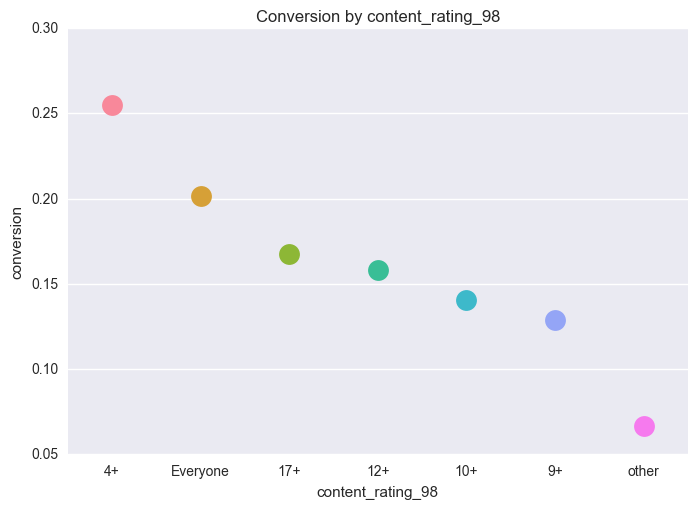

In [68]:
plot_coversion(counts_advertiser_app_store_id_98, 'content_rating_98')

In [55]:
counts_country_code_98 = get_conversion_table('country_code_98')
counts_country_code_98

,country_code_98,total_counts,install_counts,conversion
127,US,204438,53480.0,0.261595
10,AU,9571,2428.0,0.253683
41,GB,34924,8712.0,0.249456
55,IN,14033,3390.0,0.241573
103,SA,6488,1557.0,0.239982
23,CN,39984,8847.0,0.221264
135,other,68503,13089.0,0.191072
105,SE,4827,834.0,0.172778
54,IL,3282,559.0,0.170323
20,CH,3166,526.0,0.166140


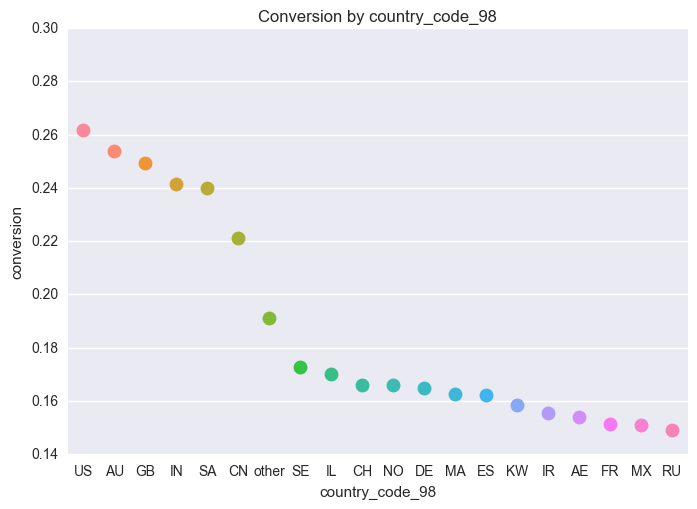

In [70]:
plot_coversion(counts_country_code_98.iloc[:20,:], 'country_code_98', 10)

In [99]:
counts_device_platform_98 = get_conversion_table('platform')
counts_device_platform_98

,platform,total_counts,install_counts,conversion
1,iOS,273660,60525,0.221169
2,windows,12095,2124,0.175610
0,android,414245,72400,0.174776


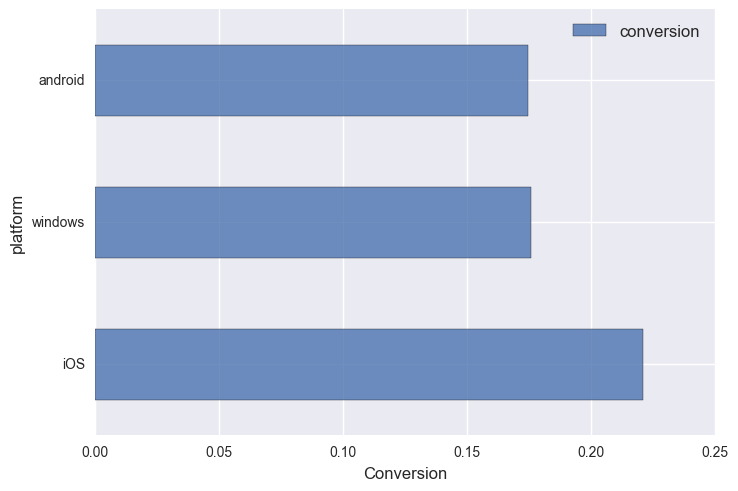

In [100]:
plot_coversion2(counts_device_platform_98, 'platform')

In [95]:
counts_n_campaign_views = get_conversion_table('n_campaign_views')
counts_n_campaign_views

,n_campaign_views,total_counts,install_counts,conversion
0,0,383478,92824.0,0.242058
1,1,121785,22173.0,0.182067
2,2,53696,7922.0,0.147534
3,3,36945,4600.0,0.124509
4,4,26769,2951.0,0.110239
73,73,64,6.0,0.093750
5,5,14074,1297.0,0.092156
133,133,11,1.0,0.090909
150,150,11,1.0,0.090909
6,6,11336,901.0,0.079481


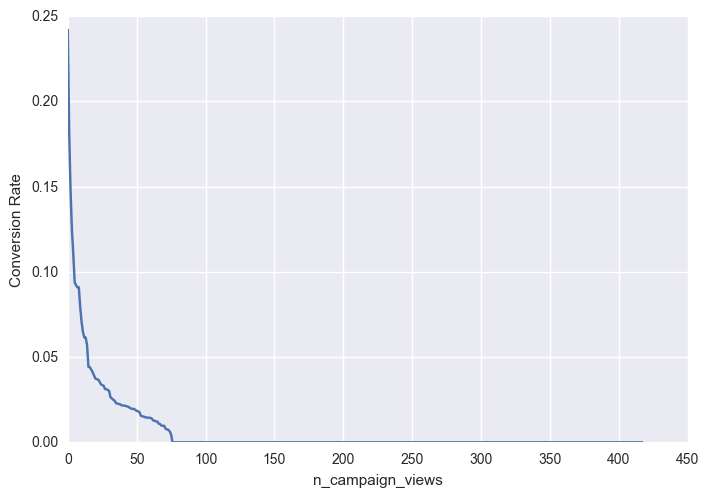

In [98]:
plt.plot(range(counts_n_campaign_views.shape[0]), counts_n_campaign_views['conversion'])
plt.xlabel('n_campaign_views')
plt.ylabel('Conversion Rate')

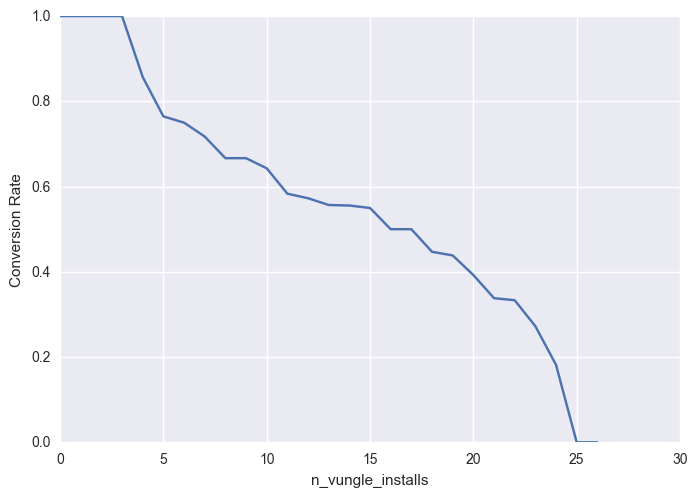

In [104]:
plt.plot(range(counts_n_vungle_installs.shape[0]), counts_n_vungle_installs['conversion'])
plt.xlabel('n_vungle_installs')
plt.ylabel('Conversion Rate')

In [134]:
counts_time_of_last_vungle_delivery_date = get_conversion_table('time_of_last_vungle_delivery_date')
counts_time_of_last_vungle_delivery_date

,time_of_last_vungle_delivery_date,total_counts,install_counts,conversion
4,T,26065,5515,0.211586
6,W,49709,10273,0.206663
1,M,32552,6574,0.201954
5,TH,114728,22956,0.200091
0,F,164738,31090,0.188724
2,Sat,173486,31821,0.183421
3,Sun,114298,20317,0.177755


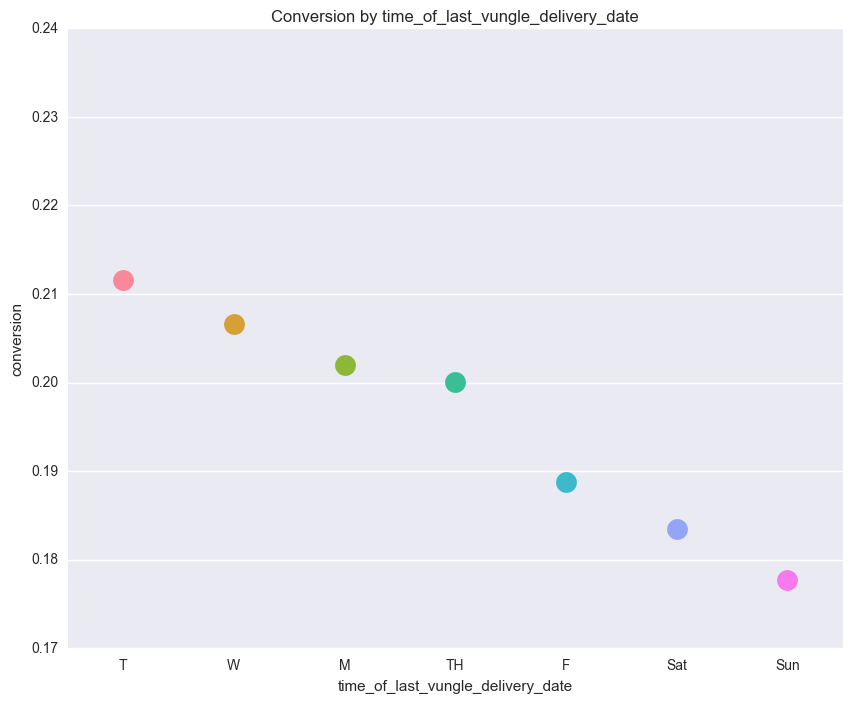

In [135]:
plot_coversion(counts_time_of_last_vungle_delivery_date, 'time_of_last_vungle_delivery_date')

In [136]:
counts_time_of_this_impression_date = get_conversion_table('time_of_this_impression_date')
counts_time_of_this_impression_date

,time_of_this_impression_date,total_counts,install_counts,conversion
0,F,185068,37245,0.201250
4,TH,88229,17378,0.196965
2,Sat,233359,45470,0.194850
3,Sun,167779,30573,0.182222
1,M,25565,4383,0.171445


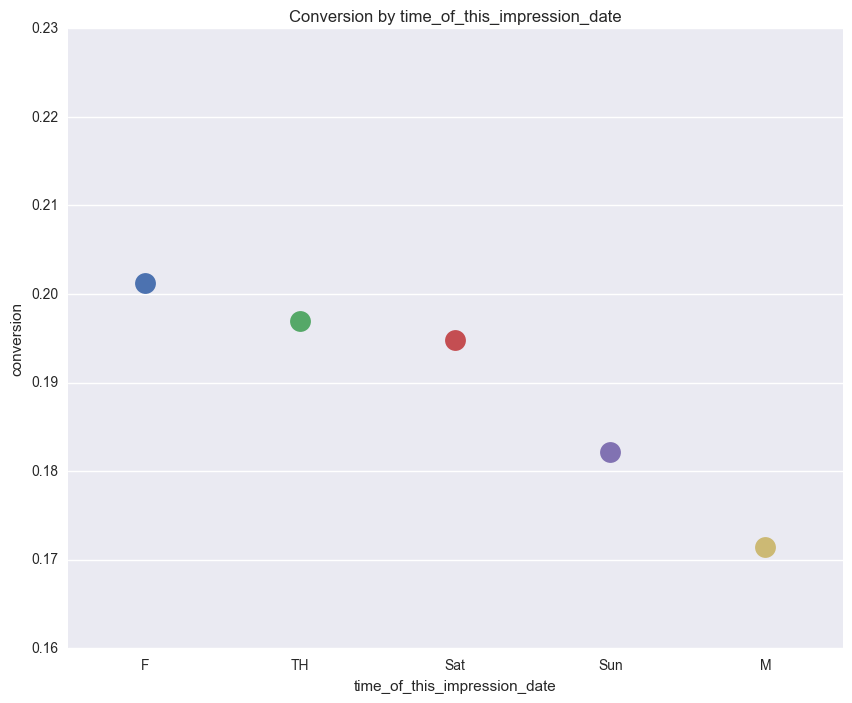

In [137]:
plot_coversion(counts_time_of_this_impression_date, 'time_of_this_impression_date')

In [138]:
counts_time_of_this_request_date = get_conversion_table('time_of_this_request_date')
counts_time_of_this_request_date

,time_of_this_request_date,total_counts,install_counts,conversion
4,T,12063,2532,0.209898
5,TH,103530,20658,0.199536
0,F,179250,35709,0.199213
6,W,24563,4841,0.197085
2,Sat,208823,40035,0.191717
1,M,28584,5208,0.182200
3,Sun,143187,26066,0.182042


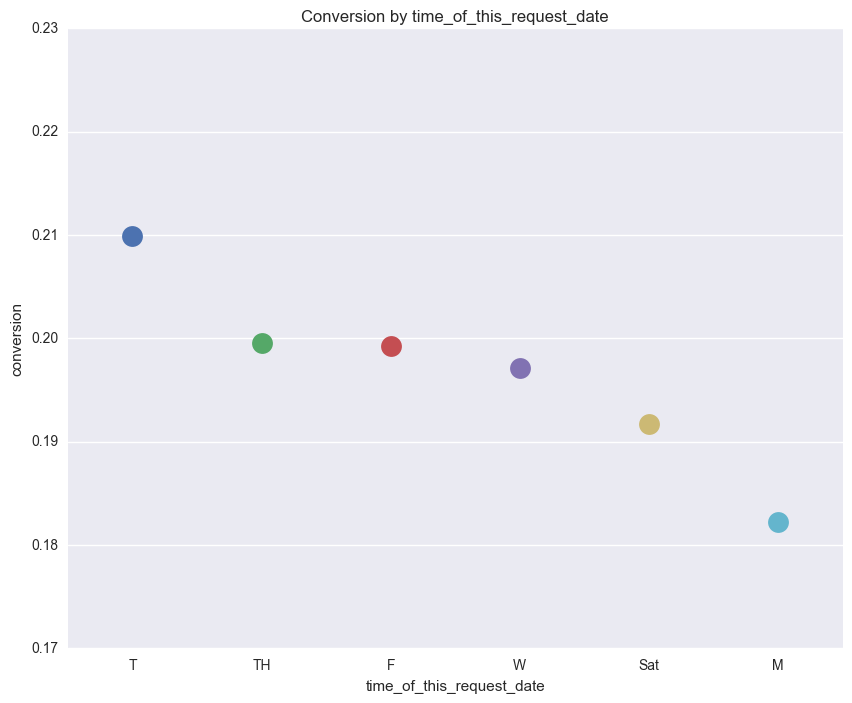

In [131]:
plot_coversion(counts_time_of_this_request_date, 'time_of_this_request_date')

In [151]:
counts_time_zone_region_98 = get_conversion_table('time_zone_region_98')
counts_time_zone_region_98

,time_zone_region_98,total_counts,install_counts,conversion
5,Australia,9525,2336.0,0.245249
1,America,289400,66602.0,0.230138
8,Pacific,4338,771.0,0.177732
3,Asia,176855,30783.0,0.174058
7,Europe,204531,32444.0,0.158626
9,other,133,20.0,0.150376
4,Atlantic,1628,235.0,0.144349
0,Africa,9346,1269.0,0.135780
6,Etc,3974,514.0,0.129341
2,Arctic,2,0.0,0.000000


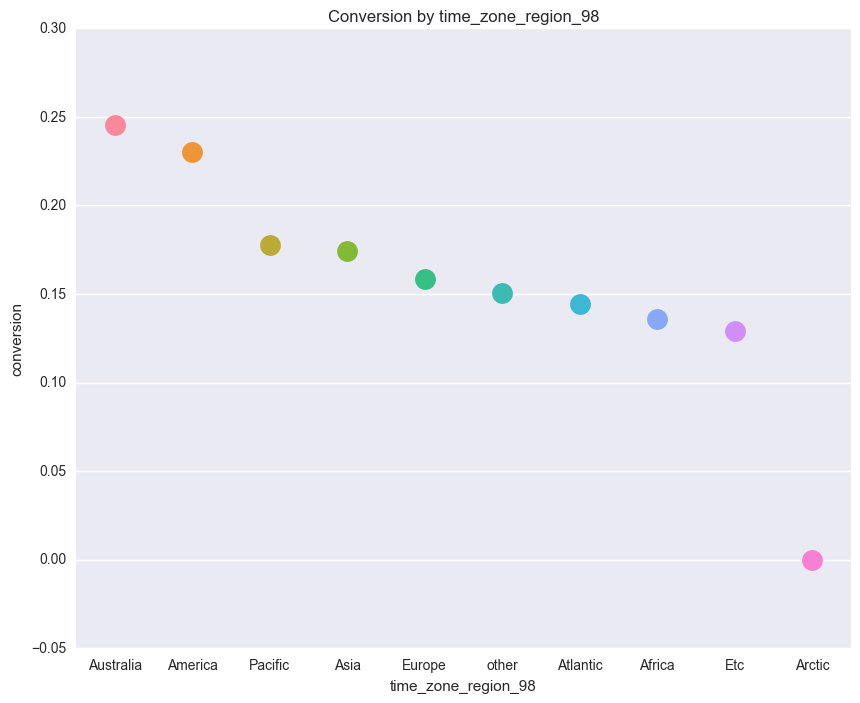

In [152]:
plot_coversion(counts_time_zone_region_98, 'time_zone_region_98')

In [182]:
counts_user_rating_round = get_conversion_table('user_rating_round')
counts_user_rating_round

,user_rating_round,total_counts,install_counts,conversion
2,2.0,7,2.0,0.285714
5,5.0,374049,90570.0,0.242134
0,0.0,7978,1115.0,0.139759
4,4.0,300211,40677.0,0.135495
3,3.0,2625,250.0,0.095238
1,1.0,1,0.0,0.000000


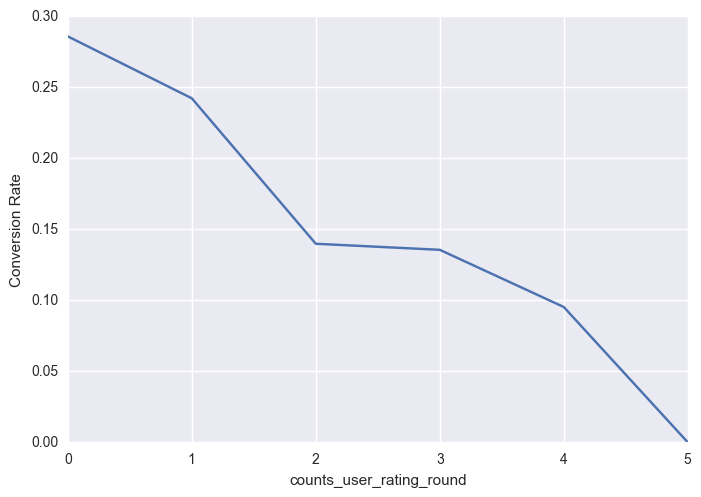

In [184]:
plt.plot(range(counts_user_rating_round.shape[0]), counts_user_rating_round['conversion'])
plt.xlabel('counts_user_rating_round')
plt.ylabel('Conversion Rate')

### useful features

'content_rating_98', 'country_code_98', 'device_os_version', 
                  'device_platform_98', 'is_install', 
                   'n_campaign_views','n_vungle_installs', 'platform',
 'time_of_last_vungle_delivery_date', 'time_of_this_impression_date', 'time_of_this_request_date',
 'time_zone_region_98','user_rating_round'